# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

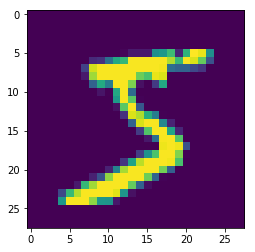

Label:  5


In [3]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

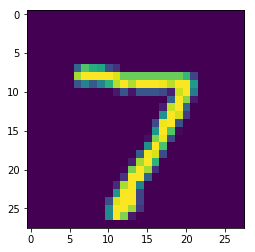

Label:  7


In [4]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [5]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [6]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19800, 784)
(10000, 784)
(19800, 10)
(10000, 10)


## Basic MLP model
- Naive MLP model without any alterations

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [56]:
model = Sequential()

In [57]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [58]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 2s - loss: 2.3665 - acc: 0.0970 - val_loss: 2.3343 - val_acc: 0.1007
Epoch 2/100
13860/13860 [==============================] - 2s - loss: 2.3190 - acc: 0.0771 - val_loss: 2.3105 - val_acc: 0.0756
Epoch 3/100
13860/13860 [==============================] - 2s - loss: 2.3054 - acc: 0.0918 - val_loss: 2.3040 - val_acc: 0.0997
Epoch 4/100
13860/13860 [==============================] - 2s - loss: 2.3016 - acc: 0.0930 - val_loss: 2.3023 - val_acc: 0.1039
Epoch 5/100
13860/13860 [==============================] - 2s - loss: 2.3005 - acc: 0.1120 - val_loss: 2.3015 - val_acc: 0.1118
Epoch 6/100
13860/13860 [==============================] - 3s - loss: 2.3000 - acc: 0.1144 - val_loss: 2.3011 - val_acc: 0.1118
Epoch 7/100
13860/13860 [==============================] - 2s - loss: 2.2997 - acc: 0.1143 - val_loss: 2.3009 - val_acc: 0.1118
Epoch 8/100
13860/13860 [==============================

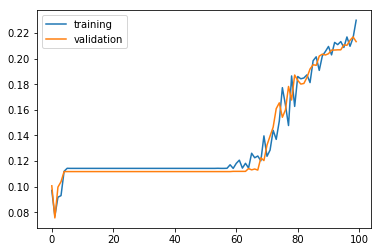

In [60]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [61]:
results = model.evaluate(X_test, y_test)

 9440/10000 [===========================>..] - ETA: 0s

In [62]:
print('Test accuracy: ', results[1])

Test accuracy:  0.2144


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [12]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [13]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 2s - loss: 2.3576 - acc: 0.1014 - val_loss: 2.3261 - val_acc: 0.1037
Epoch 2/100
13860/13860 [==============================] - 1s - loss: 2.3117 - acc: 0.0995 - val_loss: 2.3065 - val_acc: 0.0975
Epoch 3/100
13860/13860 [==============================] - 1s - loss: 2.3018 - acc: 0.1128 - val_loss: 2.3018 - val_acc: 0.1278
Epoch 4/100
13860/13860 [==============================] - 1s - loss: 2.2993 - acc: 0.1159 - val_loss: 2.3001 - val_acc: 0.1118
Epoch 5/100
13860/13860 [==============================] - 1s - loss: 2.2982 - acc: 0.1142 - val_loss: 2.2991 - val_acc: 0.1118
Epoch 6/100
13860/13860 [==============================] - 1s - loss: 2.2975 - acc: 0.1143 - val_loss: 2.2985 - val_acc: 0.1118
Epoch 7/100
13860/13860 [==============================] - 1s - loss: 2.2970 - acc: 0.1143 - val_loss: 2.2979 - val_acc: 0.1118
Epoch 8/100
13860/13860 [==============================

13860/13860 [==============================] - 1s - loss: 2.2604 - acc: 0.1615 - val_loss: 2.2615 - val_acc: 0.1779
Epoch 65/100
13860/13860 [==============================] - 1s - loss: 2.2593 - acc: 0.1563 - val_loss: 2.2604 - val_acc: 0.2049
Epoch 66/100
13860/13860 [==============================] - 1s - loss: 2.2582 - acc: 0.1942 - val_loss: 2.2594 - val_acc: 0.1976
Epoch 67/100
13860/13860 [==============================] - 1s - loss: 2.2571 - acc: 0.1848 - val_loss: 2.2582 - val_acc: 0.2266
Epoch 68/100
13860/13860 [==============================] - 2s - loss: 2.2559 - acc: 0.2280 - val_loss: 2.2570 - val_acc: 0.1901
Epoch 69/100
13860/13860 [==============================] - 1s - loss: 2.2547 - acc: 0.1965 - val_loss: 2.2558 - val_acc: 0.2239
Epoch 70/100
13860/13860 [==============================] - 1s - loss: 2.2535 - acc: 0.2225 - val_loss: 2.2547 - val_acc: 0.2389
Epoch 71/100
13860/13860 [==============================] - 1s - loss: 2.2522 - acc: 0.2727 - val_loss: 2.2535

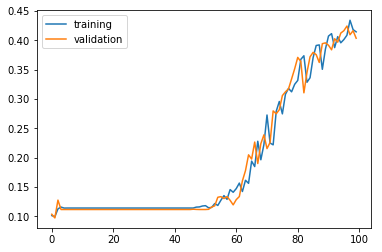

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [15]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s     


In [16]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4105


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

In [51]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [52]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 2s - loss: 4.2432 - acc: 0.5745 - val_loss: 2.1241 - val_acc: 0.6024
Epoch 2/100
13860/13860 [==============================] - 2s - loss: 0.7526 - acc: 0.8027 - val_loss: 0.8272 - val_acc: 0.7785
Epoch 3/100
13860/13860 [==============================] - 2s - loss: 0.4959 - acc: 0.8609 - val_loss: 0.8021 - val_acc: 0.7859
Epoch 4/100
13860/13860 [==============================] - 2s - loss: 0.4003 - acc: 0.8838 - val_loss: 0.6853 - val_acc: 0.8146
Epoch 5/100
13860/13860 [==============================] - 2s - loss: 0.3418 - acc: 0.8958 - val_loss: 0.4462 - val_acc: 0.8727
Epoch 6/100
13860/13860 [==============================] - 2s - loss: 0.3008 - acc: 0.9092 - val_loss: 0.4227 - val_acc: 0.8796
Epoch 7/100
13860/13860 [==============================] - 1s - loss: 0.2679 - acc: 0.9186 - val_loss: 0.6017 - val_acc: 0.8402
Epoch 8/100
13860/13860 [==============================

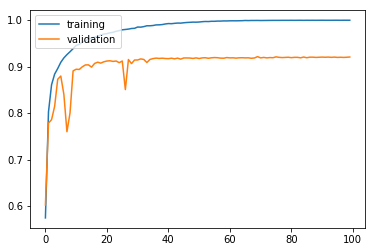

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [54]:
results = model.evaluate(X_test, y_test)

 9376/10000 [===========================>..] - ETA: 0s

In [55]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9208


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [67]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [68]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 2s - loss: 1.8950 - acc: 0.3696 - val_loss: 1.3319 - val_acc: 0.5180
Epoch 2/100
13860/13860 [==============================] - 2s - loss: 1.0769 - acc: 0.6571 - val_loss: 0.9698 - val_acc: 0.6803
Epoch 3/100
13860/13860 [==============================] - 2s - loss: 0.8463 - acc: 0.7239 - val_loss: 0.7735 - val_acc: 0.7377
Epoch 4/100
13860/13860 [==============================] - 2s - loss: 0.7216 - acc: 0.7646 - val_loss: 0.6897 - val_acc: 0.7758
Epoch 5/100
13860/13860 [==============================] - 2s - loss: 0.6574 - acc: 0.7916 - val_loss: 0.6276 - val_acc: 0.7956
Epoch 6/100
13860/13860 [==============================] - 2s - loss: 0.6113 - acc: 0.8150 - val_loss: 0.6079 - val_acc: 0.8052
Epoch 7/100
13860/13860 [==============================] - 2s - loss: 0.5580 - acc: 0.8276 - val_loss: 0.5642 - val_acc: 0.8173
Epoch 8/100
13860/13860 [==============================

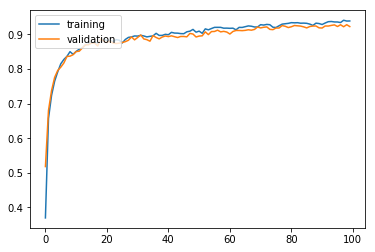

In [69]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [70]:
results = model.evaluate(X_test, y_test)

 9472/10000 [===========================>..] - ETA: 0s

In [71]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9248


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [72]:
from keras.layers import BatchNormalization

In [73]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [74]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 4s - loss: 2.2124 - acc: 0.2022 - val_loss: 2.1056 - val_acc: 0.3278
Epoch 2/100
13860/13860 [==============================] - 3s - loss: 1.9675 - acc: 0.4514 - val_loss: 1.8741 - val_acc: 0.5764
Epoch 3/100
13860/13860 [==============================] - 4s - loss: 1.8234 - acc: 0.6112 - val_loss: 1.7507 - val_acc: 0.6505
Epoch 4/100
13860/13860 [==============================] - 5s - loss: 1.7167 - acc: 0.6605 - val_loss: 1.6566 - val_acc: 0.6911
Epoch 5/100
13860/13860 [==============================] - 3s - loss: 1.6332 - acc: 0.6936 - val_loss: 1.5789 - val_acc: 0.7234
Epoch 6/100
13860/13860 [==============================] - 3s - loss: 1.5629 - acc: 0.7221 - val_loss: 1.5129 - val_acc: 0.7460
Epoch 7/100
13860/13860 [==============================] - 3s - loss: 1.4999 - acc: 0.7455 - val_loss: 1.4536 - val_acc: 0.7618
Epoch 8/100
13860/13860 [==============================

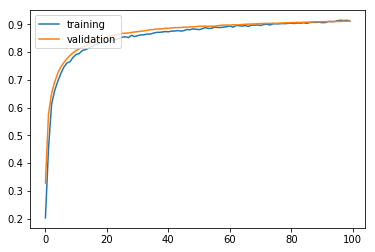

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [76]:
results = model.evaluate(X_test, y_test)

 9504/10000 [===========================>..] - ETA: 0s

In [77]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9154


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [78]:
from keras.layers import Dropout

In [79]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [80]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 2s - loss: 2.4341 - acc: 0.1029 - val_loss: 2.3369 - val_acc: 0.1118
Epoch 2/100
13860/13860 [==============================] - 2s - loss: 2.3799 - acc: 0.1040 - val_loss: 2.3119 - val_acc: 0.1118
Epoch 3/100
13860/13860 [==============================] - 2s - loss: 2.3586 - acc: 0.1013 - val_loss: 2.3040 - val_acc: 0.1118
Epoch 4/100
13860/13860 [==============================] - 2s - loss: 2.3546 - acc: 0.0981 - val_loss: 2.3019 - val_acc: 0.1118
Epoch 5/100
13860/13860 [==============================] - 2s - loss: 2.3544 - acc: 0.0969 - val_loss: 2.3016 - val_acc: 0.1118
Epoch 6/100
13860/13860 [==============================] - 2s - loss: 2.3474 - acc: 0.1022 - val_loss: 2.3017 - val_acc: 0.1118
Epoch 7/100
13860/13860 [==============================] - 2s - loss: 2.3512 - acc: 0.0994 - val_loss: 2.3016 - val_acc: 0.1118
Epoch 8/100
13860/13860 [==============================

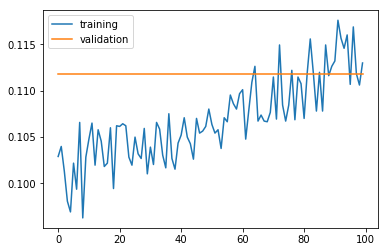

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [82]:
results = model.evaluate(X_test, y_test)

 9952/10000 [============================>.] - ETA: 0s

In [83]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1135


## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs1CBSEtpp5yj6SJ5K_nHd1FNfyEYa9KLjWfoMY_v7ARTq3tdpVw" style="width: 300px"/>

In [108]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [101]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [102]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [103]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [104]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [105]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 2s - loss: 2.4037 - acc: 0.0983     
Epoch 2/100
19800/19800 [==============================] - 2s - loss: 2.3184 - acc: 0.1047     
Epoch 3/100
19800/19800 [==============================] - 2s - loss: 2.3031 - acc: 0.1135     
Epoch 4/100
19800/19800 [==============================] - 2s - loss: 2.3002 - acc: 0.1135     
Epoch 5/100
19800/19800 [==============================] - 2s - loss: 2.2994 - acc: 0.1135     
Epoch 6/100
19800/19800 [==============================] - 2s - loss: 2.2989 - acc: 0.1135     
Epoch 7/100
19800/19800 [==============================] - 2s - loss: 2.2985 - acc: 0.1135     
Epoch 8/100
19800/19800 [==============================] - 3s - loss: 2.2981 - acc: 0.1135     
Epoch 9/100
19800/19800 [==============================] - 2s - loss: 2.2976 - acc: 0.1135     
Epoch 10/100
19800/19800 [==============================] - 2s - loss: 2.2972 - acc: 0.1135     
Epoch 11/100
19800/19800 [=============

19800/19800 [==============================] - 2s - loss: 2.2737 - acc: 0.1146     
Epoch 70/100
19800/19800 [==============================] - 2s - loss: 2.2728 - acc: 0.1157     
Epoch 71/100
19800/19800 [==============================] - 2s - loss: 2.2720 - acc: 0.1231     
Epoch 72/100
19800/19800 [==============================] - 2s - loss: 2.2712 - acc: 0.1156     
Epoch 73/100
19800/19800 [==============================] - 2s - loss: 2.2703 - acc: 0.1191     
Epoch 74/100
19800/19800 [==============================] - 2s - loss: 2.2694 - acc: 0.1161     
Epoch 75/100
19800/19800 [==============================] - 2s - loss: 2.2685 - acc: 0.1309     
Epoch 76/100
19800/19800 [==============================] - 2s - loss: 2.2675 - acc: 0.1358     
Epoch 77/100
19800/19800 [==============================] - 2s - loss: 2.2665 - acc: 0.1279     
Epoch 78/100
19800/19800 [==============================] - 2s - loss: 2.2655 - acc: 0.1979     
Epoch 79/100
19800/19800 [=================

VotingClassifier(estimators=[('model1', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F0688655F8>), ('model2', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F068865630>), ('model3', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F0688656A0>)],
         n_jobs=1, voting='soft', weights=None)

In [106]:
y_pred = ensemble_clf.predict(X_test)

 9088/10000 [==========================>...] - ETA: 0s

In [109]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.3045


Slight boost in the test accuracy from the outset **(0.2144 => 0.3045)**

## Summary

|Model           | Naive Model | He normal  | Relu        | Adam        | Batchnorm  | Dropout   | Ensemble   |
|----------------|-------------|------------|-------------|-------------|------------|-----------|------------|
|Test Accuracy   | 0.2144      | 0.4105     | 0.9208      | 0.9248      | 0.9154     | 0.1135    | 0.3045     |

<br>
It turns out that most methods improve the model training & test performance.
Why don't try them out altogether?